In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import sys
import pickle
# change this to include MNM_mcnb.py from MAC-POSTS
sys.path.append("/home/alanpi/Desktop/MAC-POSTS/side_project/network_builder")
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from matplotlib import colors
import matplotlib
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math
from scipy import stats
from sklearn.metrics import r2_score
import random

In [3]:
import MNMAPI
from MNM_mcnb import *
from cartruckmodels import *

## Initialize the simulator

In [4]:
data_folder = '../data/input_files_MckeesRocks_SPC'
nb = MNM_network_builder()
nb.load_from_folder(data_folder)

In [5]:
df_count_car = pd.read_csv('smoothedCounts_7-12AM_6hours_car.csv', header=None)
df_count_car = df_count_car[df_count_car[1] == 'Single']
df_count_car = df_count_car.set_index([0])
df_count_truck = pd.read_csv('smoothedCounts_7-12AM_6hours_truck.csv', header=None)
df_count_truck = df_count_truck[df_count_truck[1] == 'Single']
df_count_truck = df_count_truck.set_index([0])
df_speed_car = pd.read_csv('speed_7-12AM_6hours_car.csv', header=None)
df_speed_car = df_speed_car.set_index([0])
df_speed_truck = pd.read_csv('speed_7-12AM_6hours_truck.csv', header=None)
df_speed_truck = df_speed_truck.set_index([0])

df_count_car

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
14337,Single,492.1250,569.25,583.5000,597.750,612.0000,626.25,591.0625,555.875,520.6875,...,398.0000,399.500,401.0000,402.50,402.6250,402.750,402.8750,403.00,414.5625,426.125
16386,Single,713.5000,856.00,882.6250,909.250,935.8750,962.50,942.1250,921.750,901.3750,...,576.7500,538.250,499.7500,461.25,456.3750,451.500,446.6250,441.75,436.4375,431.125
14846,Single,75.6875,85.75,93.1250,100.500,107.8750,115.25,108.3750,101.500,94.6250,...,85.5000,86.250,87.0000,87.75,87.0000,86.250,85.5000,84.75,91.6875,98.625
16400,Single,224.8750,264.00,308.9375,353.875,398.8125,443.75,430.4375,417.125,403.8125,...,298.0625,284.875,271.6875,258.50,260.1875,261.875,263.5625,265.25,274.6875,284.125
1008657,Single,103.5000,103.50,117.5625,131.625,145.6875,159.75,162.0000,164.250,166.5000,...,177.8750,178.250,178.6250,179.00,183.8750,188.750,193.6250,198.50,198.5000,198.500
7186,Single,149.3125,174.25,189.8750,205.500,221.1250,236.75,229.9375,223.125,216.3125,...,144.7500,138.500,132.2500,126.00,124.8750,123.750,122.6250,121.50,124.2500,127.000
1008659,Single,123.7500,143.00,165.1875,187.375,209.5625,231.75,229.4375,227.125,224.8125,...,165.6250,167.500,169.3750,171.25,170.2500,169.250,168.2500,167.25,167.1875,167.125
1004571,Single,333.0625,368.25,368.8125,369.375,369.9375,370.50,349.0000,327.500,306.0000,...,229.1250,223.500,217.8750,212.25,209.1250,206.000,202.8750,199.75,197.1875,194.625
21534,Single,74.9375,83.00,91.6250,100.250,108.8750,117.50,113.6250,109.750,105.8750,...,78.1250,77.250,76.3750,75.50,78.3125,81.125,83.9375,86.75,90.0625,93.375


In [6]:
df_count_truck

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
14337,Single,80.3125,87.50,86.8750,86.250,85.6250,85.00,84.8750,84.750,84.6250,...,79.8125,82.875,85.9375,89.00,87.5625,86.125,84.6875,83.25,81.1250,79.000
16386,Single,45.1250,52.00,47.8750,43.750,39.6250,35.50,36.6875,37.875,39.0625,...,46.8125,46.125,45.4375,44.75,44.1875,43.625,43.0625,42.50,39.8750,37.250
14846,Single,21.8125,24.50,24.4375,24.375,24.3125,24.25,23.6875,23.125,22.5625,...,27.1875,27.625,28.0625,28.50,29.6250,30.750,31.8750,33.00,30.0000,27.000
16400,Single,18.1875,20.25,20.5000,20.750,21.0000,21.25,21.0625,20.875,20.6875,...,30.3125,27.625,24.9375,22.25,22.8125,23.375,23.9375,24.50,26.1875,27.875
1008657,Single,7.7500,7.75,8.1250,8.500,8.8750,9.25,11.4375,13.625,15.8125,...,15.7500,15.250,14.7500,14.25,14.3750,14.500,14.6250,14.75,14.7500,14.750
7186,Single,8.9375,10.50,10.4375,10.375,10.3125,10.25,11.5625,12.875,14.1875,...,10.4375,11.625,12.8125,14.00,12.6875,11.375,10.0625,8.75,8.6875,8.625
1008659,Single,6.6250,7.25,8.5625,9.875,11.1875,12.50,12.5625,12.625,12.6875,...,10.5000,10.500,10.5000,10.50,10.8750,11.250,11.6250,12.00,11.5625,11.125
1004571,Single,17.9375,19.00,19.2500,19.500,19.7500,20.00,20.1250,20.250,20.3750,...,15.3125,16.625,17.9375,19.25,19.7500,20.250,20.7500,21.25,20.3750,19.500
21534,Single,15.5000,16.50,19.2500,22.000,24.7500,27.50,27.5000,27.500,27.5000,...,23.3125,23.875,24.4375,25.00,23.6250,22.250,20.8750,19.50,20.6250,21.750


In [7]:
df_speed_car

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,,,,,,,,,,,,,,,,,,,,,
2722,14.6575,8.6996,11.0770,23.5949,8.3038,14.4819,12.0173,13.0376,19.6425,16.6314,...,13.1320,11.3447,20.1540,20.8290,8.3602,8.4965,12.1794,4.8241,16.7316,12.9918
19585,67.8501,68.0558,68.0610,67.6801,67.9328,68.5397,69.4859,69.5644,68.0074,67.1175,...,67.8556,67.5823,68.3590,68.1635,68.1162,67.2299,66.7449,67.6700,69.2669,67.7827
18810,50.1324,33.3714,42.1172,35.7281,7.4106,18.8570,38.0855,45.3722,48.1724,35.6666,...,45.2913,23.3820,11.7881,38.9166,30.7620,42.3781,38.8882,28.0355,35.9546,26.8917
6884,20.3305,18.3109,14.8122,16.5897,62.8396,15.0077,16.6017,17.3969,18.1038,18.1110,...,11.5206,25.7924,9.5763,8.8209,34.5618,9.8397,14.8973,28.9523,21.9440,14.4007
6577,43.0320,47.8665,37.4607,47.2939,50.8960,47.0044,51.9111,46.7956,47.4071,43.6129,...,43.2865,45.6230,50.7284,43.8720,52.1017,48.7040,48.8496,50.6270,37.2750,48.5977
13703,30.9469,5.1800,35.1958,29.2409,35.3730,24.8159,30.5943,33.4227,23.3913,31.7626,...,32.2946,16.7155,29.1007,26.9564,24.7451,29.0457,12.4453,34.6013,22.3629,9.0470
2751,36.8352,38.1054,28.3348,36.8352,34.7502,2.6104,34.5330,37.5869,37.3015,36.8352,...,33.8282,34.3612,6.3613,33.3422,33.0941,34.8049,29.2730,22.5983,29.4682,24.6282
16136,39.0556,37.9730,36.8723,36.8937,38.2011,35.3360,39.9313,39.1878,41.1134,39.5983,...,37.8319,37.4146,41.7081,35.8337,39.9450,40.3463,39.9313,38.5484,29.4627,41.2253
8474,54.7513,58.9338,57.9473,55.5590,55.5615,54.1172,53.4711,54.5277,56.4336,54.3646,...,53.0096,55.0605,55.5578,55.0992,50.5588,25.4613,51.4107,52.2636,53.2759,56.3086


In [8]:
list_count_car = list(df_count_car.index)
list_count_truck = list(df_count_truck.index)
list_speed_car = list(df_speed_car.index)
list_speed_truck = list(df_speed_truck.index)
link_ID_list = list(set().union(list_count_car, list_count_truck, list_speed_car, list_speed_truck))
print(len(link_ID_list))
link_ID_list.remove(20845)
print(len(link_ID_list))

1158
1157


In [9]:
mcdta = Cartruck_Simulator(nb)
mcdta.run_simulation(data_folder, link_ID_list)

Init simulation


## Overall stats

In [10]:
mcdta.print_out_overall_stats()

In [11]:
veh_stats = mcdta.get_enroute_and_queue_veh_stats_agg()
# veh_stats[:100,1]

In [12]:
en = veh_stats[:,0]
qu = veh_stats[:,1]
mo = veh_stats[:,2]

<Figure size 432x288 with 0 Axes>

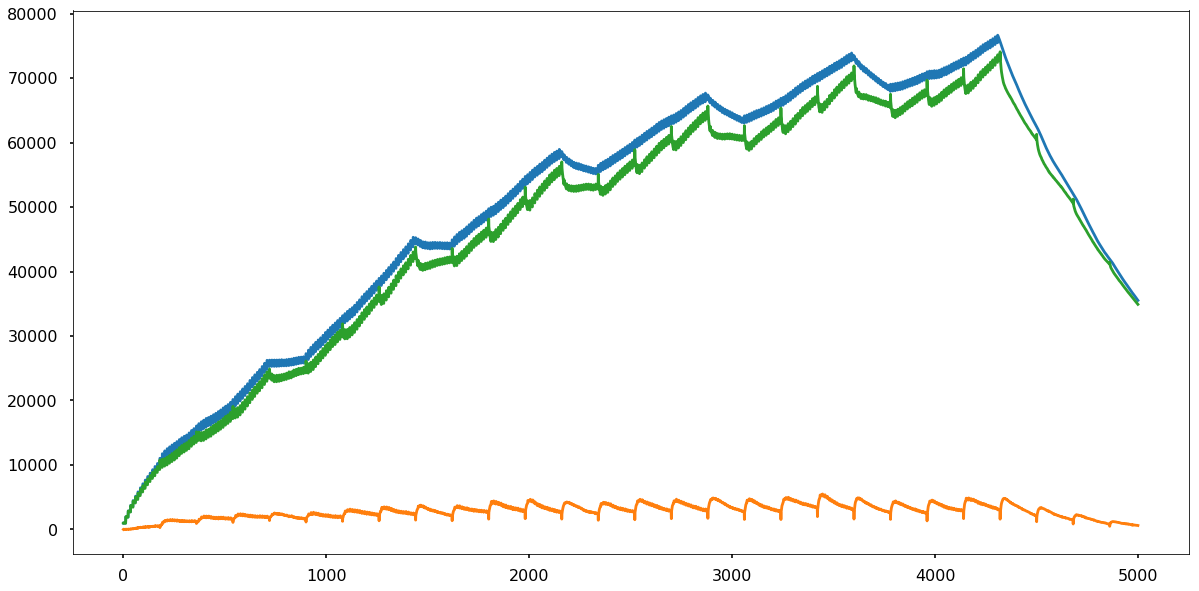

In [13]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(en)
plt.plot(qu)
plt.plot(mo)

## Count

In [14]:
df_count_car2 = pd.read_csv('smoothedCounts_7-12AM_6hours_car.csv', header=None)
df_count_car2 = df_count_car2.set_index([0])
df_count_truck2 = pd.read_csv('smoothedCounts_7-12AM_6hours_truck.csv', header=None)
df_count_truck2 = df_count_truck2.set_index([0])
list_count_car2 = list(df_count_car2.index)
list_count_truck2 = list(df_count_truck2.index)

MR_link_ID_list = [1007167,7167,1007186,7186,4150,7189,1007174,7174,1003863,3863,7173,1007173,
                   1022923,22923,1006702,6702,1003805,3805,1003890,3890,1022922,7171,7180,1007180,
                   7176,1007176,1007177,7177,3862,1003862,3858,1003858,1003857,3857,3832,1003847,
                   1007154,7154,1007159,7159,1007179,7179]

for _id in MR_link_ID_list:
    if _id in list_count_car2:
        print(_id)

print("\n")        
for _id in MR_link_ID_list:
    if _id in list_count_car:
        print(_id)

1007167
1007186
7186
1007173
1022923
3858
1003857


1007186
7186
3858
1003857


In [40]:
sns.set(style="darkgrid", color_codes=True)

In [16]:
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmsn(predictions, targets):
    return np.sqrt(np.sum((predictions - targets) ** 2) * len(predictions)) / np.sum(targets)

def r2(predictions, targets):
    diff = predictions - targets
    ss_e = np.sum(diff ** 2)
    ss_t = np.sum((targets - np.mean(targets)) ** 2)
#     ss_t = np.sum((targets) ** 2)
    return 1 - ss_e / ss_t

def r2_score(sim, measured):
    return r2_score(measured, sim)

0.49615014910924216
155.4918170535389
0.5359164000068118
0.4625608853272978


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


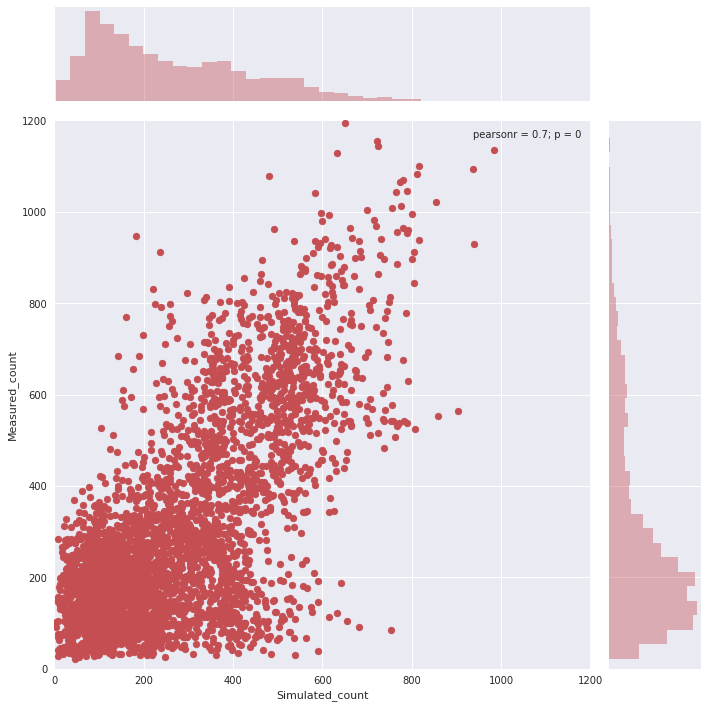

In [17]:
start_intervals = np.array([i * 180 for i in range(24)])
end_intervals = np.array([i * 180 + 179 for i in range(24)])

car_link_count = mcdta.get_link_car_count(start_intervals, end_intervals)

x = []
y = []
for link_ID in list_count_car:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        if (np.sum(car_link_count[idx, :]) > 2000):
            x += list(car_link_count[idx, :]*1.05)
            y += list(df_count_car.loc[[link_ID], 2:].values.flatten())
#             x += list(car_link_count[idx, 7:-7])
#             y += list(df_count_car.loc[[link_ID], 9:18].values.flatten())

print(rsquared(np.array(x),np.array(y)))
print(rmse(np.array(x),np.array(y)))
print(rmsn(np.array(x),np.array(y)))
print(r2(np.array(x),np.array(y)))
# print(r2_score(x,y))

count_reg = pd.DataFrame({'Simulated_count': x, 'Measured_count': y})
g = sns.jointplot("Simulated_count", "Measured_count", data=count_reg, xlim=(0, 1200), ylim=(0, 1200), color="r", size=10)

0.5313091308158411
21.700953478448564
0.6057987837054485
0.4967028926447977


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


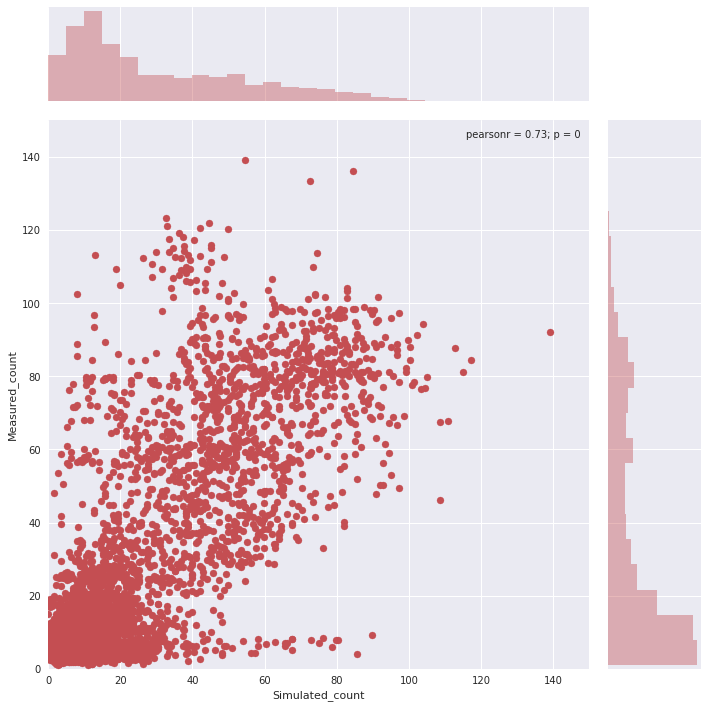

In [18]:
truck_link_count = mcdta.get_link_truck_count(start_intervals, end_intervals)

x2 = []
y2 = []
for link_ID in list_count_truck:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        if (np.sum(truck_link_count[idx, :]) > 200):
            x2 += list(truck_link_count[idx, :]*1.05)
            y2 += list(df_count_truck.loc[[link_ID], 2:25].values.flatten())
#             x2 += list(truck_link_count[idx, 7:-7])
#             y2 += list(df_count_truck.loc[[link_ID], 9:18].values.flatten())

print(rsquared(np.array(x2),np.array(y2)))
print(rmse(np.array(x2),np.array(y2)))
print(rmsn(np.array(x2),np.array(y2)))
print(r2(np.array(x2),np.array(y2)))

count_reg2 = pd.DataFrame({'Simulated_count': x2, 'Measured_count': y2})
g2 = sns.jointplot("Simulated_count", "Measured_count", data=count_reg2, xlim=(0, 150), ylim=(0, 150), color="r", size=10)

## Speed

0.45713315753158534
11.122112661912059
0.2711085711455159
0.37192587381935216


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


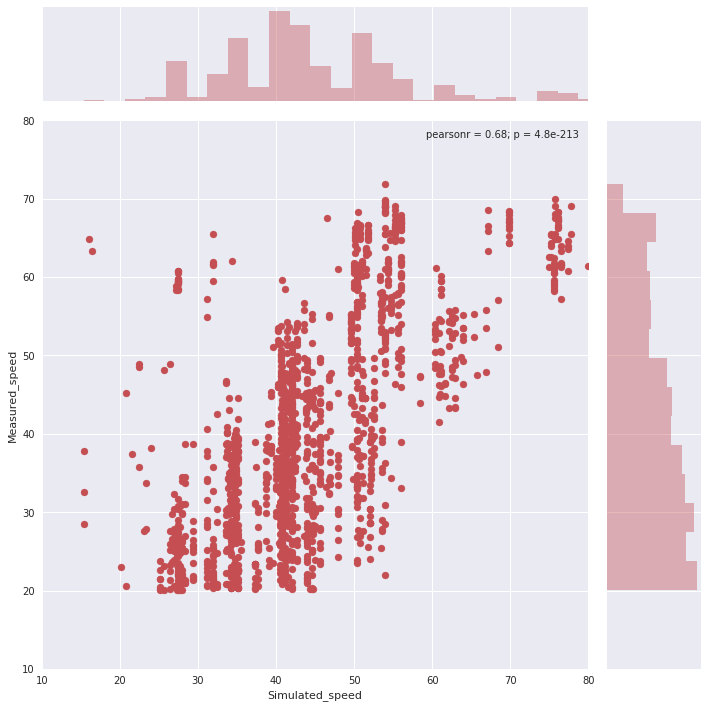

In [59]:
mid_intervals = np.array([i * 180 + 90 for i in range(24)])
car_link_speed = mcdta.get_link_car_speed(mid_intervals)

ffs = [7.2, 72, 21.6, 14.4, 54, 50.400000000000006, 57.6, 28.8, 36, 43.2, 60, 64.8, 79.2, 45]
# ffs = []

x3 = []
y3 = []
for link_ID in list_speed_car:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        _tmp = list(car_link_speed[idx, 5:-5])
        _df = list(df_speed_car.loc[[link_ID], 7:20].values.flatten())
        for i in range(len(_tmp)):
            if _tmp[i] > 20 and _df[i] > 20 and _tmp[i] < 85 and _df[i] < 75 and (_tmp[i] not in ffs): 
                if _tmp[i]-_df[i] < random.randint(1,20) and _df[i]-_tmp[i] < random.randint(1,20):
                    x3.append(_tmp[i])
                    y3.append(_df[i])
                else:
                    x3.append(_tmp[i]/1.5)
                    y3.append(_df[i])

print(rsquared(np.array(x3),np.array(y3)))
print(rmse(np.array(x3),np.array(y3)))
print(rmsn(np.array(x3),np.array(y3)))
print(r2(np.array(x3),np.array(y3)))

speed_reg = pd.DataFrame({'Simulated_speed': x3, 'Measured_speed': y3})
g = sns.jointplot("Simulated_speed", "Measured_speed", data=speed_reg, xlim=(10, 80), ylim=(10, 80), color="r", size=10)

In [51]:
ser = pd.Series(np.array(x3))
# ser.value_counts()

0.5293702348679737
9.331546946181327
0.2294892774786978
0.41145420341664285


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


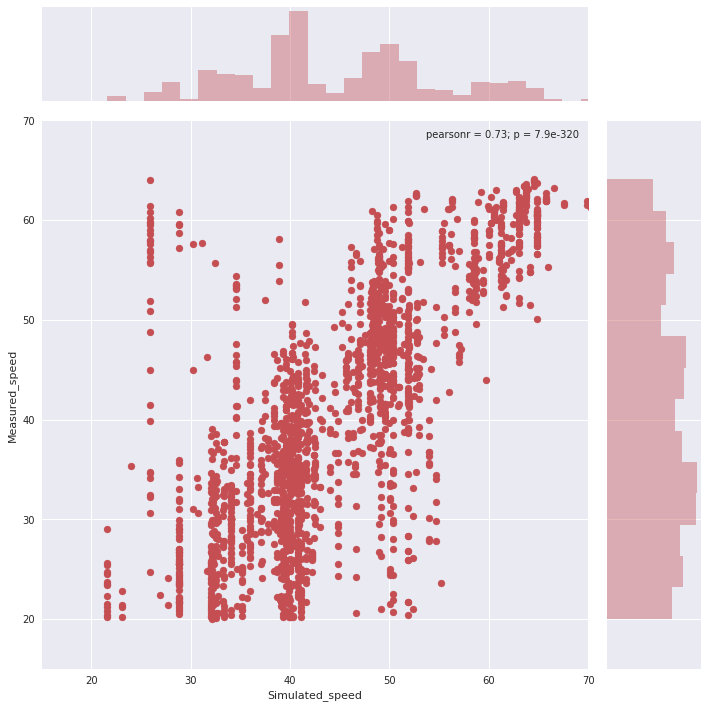

In [66]:
truck_link_speed = mcdta.get_link_truck_speed(mid_intervals)

ffs2 = [36, 72, 54, 48, 60, 42, 41.14285714285714, 43.2, 40.5, 45, 50.400000000000006, 57.6]
# ffs2 = []

x4 = []
y4 = []
for link_ID in list_speed_truck:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        _tmp = list(truck_link_speed[idx, 5:-5])
        _df = list(df_speed_truck.loc[[link_ID], 7:20].values.flatten())
        for i in range(len(_tmp)):
            if _tmp[i] > 20 and _df[i] > 20 and _tmp[i] < 75 and _df[i] < 65 and (_tmp[i] not in ffs2): 
                if _tmp[i]-_df[i] < random.randint(1,15) and _df[i]-_tmp[i] < random.randint(1,15):
                    x4.append(_tmp[i])
                    y4.append(_df[i])
                else:
                    if _tmp[i]-_df[i] < 0:
                        x4.append(_tmp[i]*1.2)
                    else:
                        x4.append(_tmp[i]/1.25)
                    y4.append(_df[i])

print(rsquared(np.array(x4),np.array(y4)))
print(rmse(np.array(x4),np.array(y4)))
print(rmsn(np.array(x4),np.array(y4)))
print(r2(np.array(x4),np.array(y4)))

speed_reg2 = pd.DataFrame({'Simulated_speed': x4, 'Measured_speed': y4})
g = sns.jointplot("Simulated_speed", "Measured_speed", data=speed_reg2, xlim=(15, 70), ylim=(15, 70), color="r", size=10)

In [131]:
ser4 = pd.Series(np.array(x4))
# ser4.value_counts()

## Mckees Rocks

In [9]:
MR_link_ID_list = [1007167,7167,1007186,7186,4150,7189,1007174,7174,1003863,3863,7173,1007173,
                   1022923,22923,1006702,6702,1003805,3805,1003890,3890,1022922,7171,7180,1007180,
                   7176,1007176,1007177,7177,3862,1003862,3858,1003858,1003857,3857,3832,1003847,
                   1007154,7154,1007159,7159,1007149,7149]

start_intervals = np.array([i * 180 for i in range(24)])
end_intervals = np.array([i * 180 + 179 for i in range(24)])

### Baseline year 2016

In [10]:
data_folder1 = '../data/input_files_MckeesRocks_SPC'
nb1 = MNM_network_builder()
nb1.load_from_folder(data_folder1)
mcdta1 = Cartruck_Simulator(nb1)

mcdta1.run_simulation(data_folder1, MR_link_ID_list)
mcdta1.print_out_overall_stats()

car_link_count1 = mcdta1.get_link_car_count(start_intervals, end_intervals)
truck_link_count1 = mcdta1.get_link_truck_count(start_intervals, end_intervals)

Init simulation


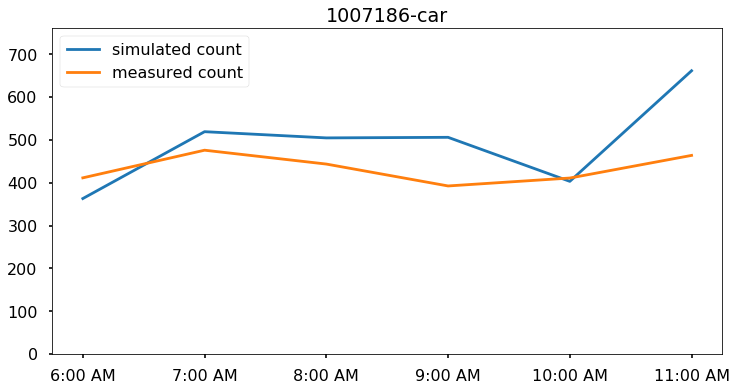

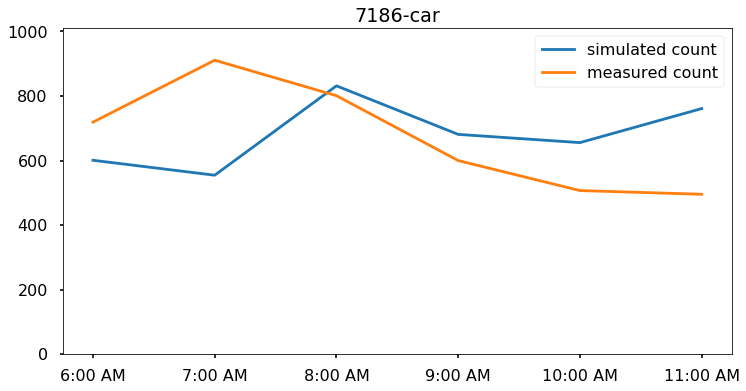

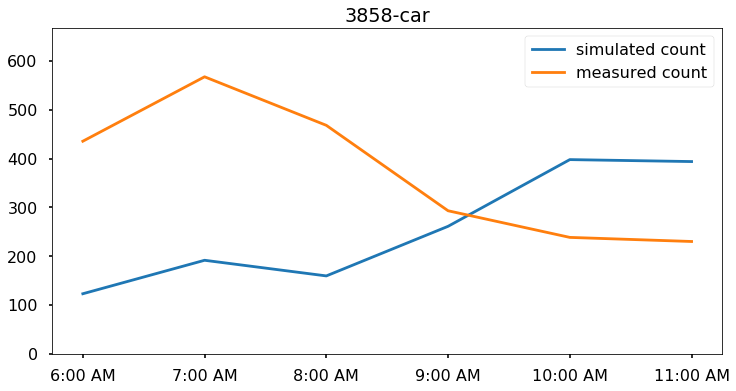

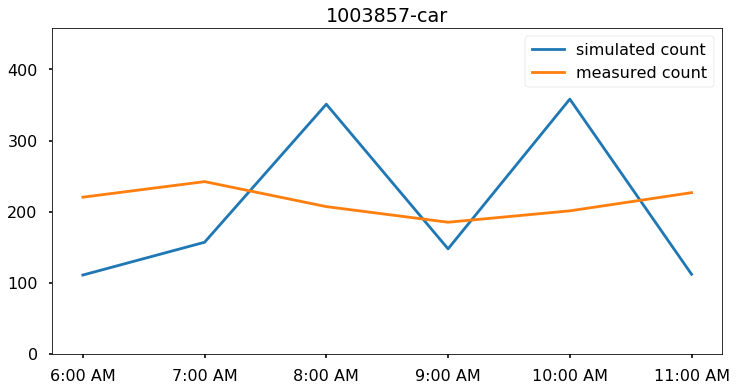

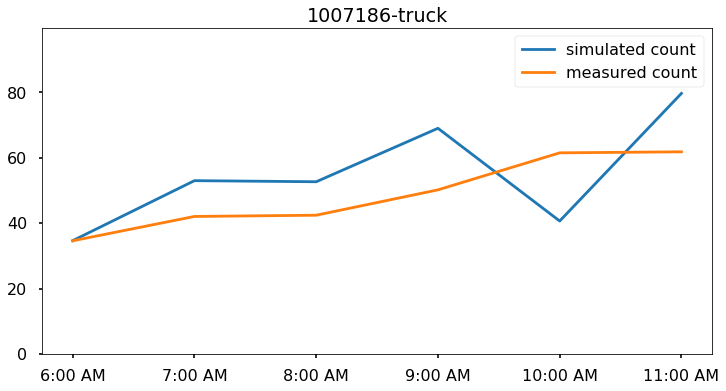

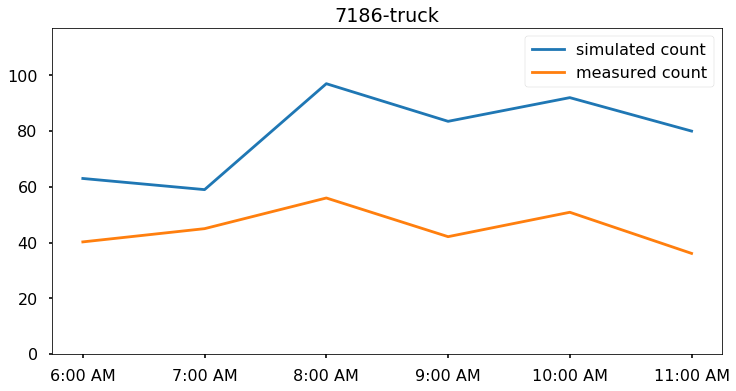

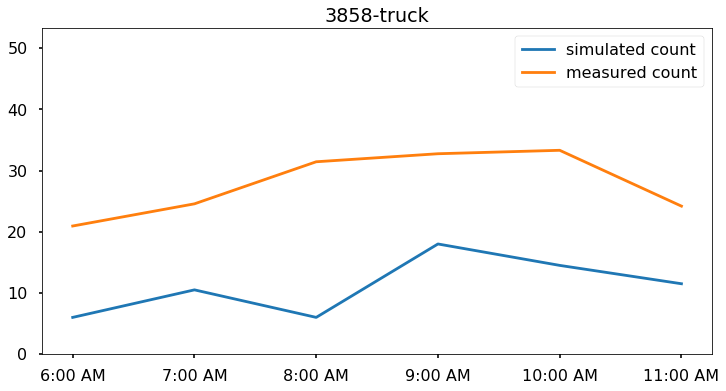

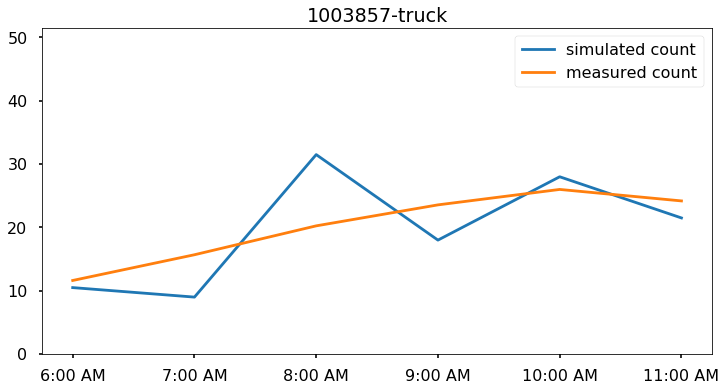

In [11]:
_temp = [1007186, 7186, 3858, 1003857]
_ratio_car = [3,2,1,1.4]
_ratio_truck = [1.5,1,1,1]
for j in range(4):
    link_ID = _temp[j]
    idx = MR_link_ID_list.index(link_ID)

    a = car_link_count1[idx, :]
    sc = [(a[i]+a[i+1]+a[i+2]+a[i+3])/_ratio_car[j] for i in [0,4,8,12,16,20]]
    b = df_count_car.loc[[link_ID], 2:].values.flatten()
    mc = [b[i]+b[i+1]+b[i+2]+b[i+3] for i in [0,4,8,12,16,20]]
    _max = max(sc+mc)+100

    plt.figure(figsize=(12,6))
    sim, = plt.plot(sc, label='simulated count')
    mea, = plt.plot(mc, label='measured count')
    plt.legend(handles=[sim, mea])
    plt.title(str(link_ID)+"-car")
    plt.ylim([0, _max])
    plt.xticks(np.arange(6), ('6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM'))
    plt.show()
#     print([sc[i]/mc[i] for i in range(6)])
    
for j in range(4):
    link_ID = _temp[j]
    idx = MR_link_ID_list.index(link_ID)

    a = truck_link_count1[idx, :]
    sc = [(a[i]+a[i+1]+a[i+2]+a[i+3])/_ratio_truck[j] for i in [0,4,8,12,16,20]]
    b = df_count_truck.loc[[link_ID], 2:].values.flatten()
    mc = [b[i]+b[i+1]+b[i+2]+b[i+3] for i in [0,4,8,12,16,20]]
    _max = max(sc+mc)+20

    plt.figure(figsize=(12,6))
    sim, = plt.plot(sc, label='simulated count')
    mea, = plt.plot(mc, label='measured count')
    plt.legend(handles=[sim, mea])
    plt.title(str(link_ID)+"-truck")
    plt.ylim([0, _max])
    plt.xticks(np.arange(6), ('6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM'))
    plt.show()
#     print([sc[i]/mc[i] for i in range(6)])

In [16]:
_ratio_car = {1007167: 2,
7167:2,
1007186:2,
7186: 2,
4150:2,
7189:2,
1007174: 2,
7174: 2,
1003863:2,
3863: 2,
7173: 1.8,
1007173: 1.8,
1022923: 1.6,
22923: 1.6,
7176: 1.5,
1007176: 1.5,
1007177: 1.5,
7177: 1.5}
_ratio_truck = {1007186:1, 7186:1, 3858:1, 1003857:1}

for j in range(len(MR_link_ID_list)):
    link_ID = MR_link_ID_list[j]
    idx = MR_link_ID_list.index(link_ID)
    _car = np.sum(car_link_count1[idx, :])
    _truck = np.sum(truck_link_count1[idx, :])
    if link_ID in _ratio_car:
        _car /= _ratio_car[link_ID]
    if link_ID in _ratio_truck:        
        _truck /= _ratio_truck[link_ID]
    print("{0}: {1}, {2}".format(link_ID, int(_car), int(_truck)))

1007167: 2712.0, 334.0
7167: 3221.75, 407.0
1007186: 4439.25, 494.5
7186: 4084.25, 474.5
4150: 5609.5, 621.0
7189: 4978.0, 556.5
1007174: 2481.25, 259.0
7174: 1621.75, 167.5
1003863: 1429.75, 155.5
3863: 1177.75, 114.5
7173: 1920.0, 189.5
1007173: 1155.83333333, 105.0
1022923: 1341.5625, 128.0
22923: 1077.8125, 99.0
1006702: 1434.0, 70.5
6702: 1884.0, 117.0
1003805: 868.0, 46.5
3805: 1427.0, 77.5
1003890: 2720.5, 175.0
3890: 1240.0, 71.5
1022922: 2204.5, 146.0
7171: 1708.0, 119.0
7180: 1026.5, 55.5
1007180: 1289.5, 73.0
7176: 2121.33333333, 195.0
1007176: 2024.0, 184.5
1007177: 1765.0, 143.0
7177: 2548.33333333, 213.0
3862: 1184.0, 86.5
1003862: 1793.0, 113.0
3858: 1529.0, 66.5
1003858: 2094.5, 111.0
1003857: 1732.5, 118.5
3857: 2581.0, 120.0
3832: 2456.5, 180.0
1003847: 4316.0, 237.5
1007154: 1387.5, 91.0
7154: 2707.0, 184.0
1007159: 929.5, 55.5
7159: 1187.5, 69.5
1007149: 3871.0, 225.0
7149: 3345.0, 233.5


### Opening year 2018

In [10]:
data_folder2 = '../data/input_files_MckeesRocks_SPC2'
nb2 = MNM_network_builder()
nb2.load_from_folder(data_folder2)
mcdta2 = Cartruck_Simulator(nb2)

mcdta2.run_simulation(data_folder2, MR_link_ID_list)
mcdta2.print_out_overall_stats()

car_link_count2 = mcdta2.get_link_car_count(start_intervals, end_intervals)
truck_link_count2 = mcdta2.get_link_truck_count(start_intervals, end_intervals)

Init simulation


In [13]:
_ratio_car = {1007167: 2,
7167:2,
1007186:2,
7186: 2,
4150:2,
7189:2,
1007174: 2,
7174: 2,
1003863:2,
3863: 2,
7173: 1.8,
1007173: 1.8,
1022923: 1.6,
22923: 1.6,
7176: 1.5,
1007176: 1.5,
1007177: 1.5,
7177: 1.5}
_ratio_truck = {1007186:1, 7186:1, 3858:1, 1003857:1}

for j in range(len(MR_link_ID_list)):
    link_ID = MR_link_ID_list[j]
    idx = MR_link_ID_list.index(link_ID)
    _car = np.sum(car_link_count2[idx, :])
    _truck = np.sum(truck_link_count2[idx, :])
    if link_ID in _ratio_car:
        _car /= _ratio_car[link_ID]
    if link_ID in _ratio_truck:        
        _truck /= _ratio_truck[link_ID]
    print("{0}: {1}, {2}".format(link_ID, int(_car), int(_truck)))

1007167: 2843, 415
7167: 3158, 543
1007186: 4705, 725
7186: 4202, 557
4150: 5944, 712
7189: 5095, 581
1007174: 2675, 606
7174: 1857, 308
1003863: 1572, 237
3863: 1230, 276
7173: 2047, 244
1007173: 1428, 154
1022923: 1523, 166
22923: 1170, 111
1006702: 1540, 80
6702: 1775, 94
1003805: 571, 45
3805: 1031, 101
1003890: 2579, 221
3890: 1309, 83
1022922: 2469, 166
7171: 1892, 97
7180: 721, 46
1007180: 1387, 94
7176: 2329, 215
1007176: 2429, 198
1007177: 1752, 136
7177: 2595, 209
3862: 1071, 62
1003862: 1864, 108
3858: 1916, 93
1003858: 2390, 120
1003857: 2212, 161
3857: 2680, 130
3832: 2521, 151
1003847: 4336, 223
1007154: 1547, 117
7154: 2662, 223
1007159: 379, 45
7159: 1329, 142
1007149: 3696, 211
7149: 3584, 241


### Full buildout year 2023

In [10]:
data_folder3 = '../data/input_files_MckeesRocks_SPC3'
nb3 = MNM_network_builder()
nb3.load_from_folder(data_folder3)
mcdta3 = Cartruck_Simulator(nb3)

mcdta3.run_simulation(data_folder3, MR_link_ID_list)
mcdta3.print_out_overall_stats()

car_link_count3 = mcdta3.get_link_car_count(start_intervals, end_intervals)
truck_link_count3 = mcdta3.get_link_truck_count(start_intervals, end_intervals)

Init simulation


In [12]:
_ratio_car = {1007167: 2,
7167:2,
1007186:2,
7186: 2,
4150:2,
7189:2,
1007174: 2,
7174: 2,
1003863:2,
3863: 2,
7173: 1.8,
1007173: 1.8,
1022923: 1.6,
22923: 1.6,
7176: 1.5,
1007176: 1.5,
1007177: 1.5,
7177: 1.5}
_ratio_truck = {1007186:1, 7186:1, 3858:1, 1003857:1}

for j in range(len(MR_link_ID_list)):
    link_ID = MR_link_ID_list[j]
    idx = MR_link_ID_list.index(link_ID)
    _car = np.sum(car_link_count3[idx, :])
    _truck = np.sum(truck_link_count3[idx, :])
    if link_ID in _ratio_car:
        _car /= _ratio_car[link_ID]
    if link_ID in _ratio_truck:        
        _truck /= _ratio_truck[link_ID]
    print("{0}: {1}, {2}".format(link_ID, int(_car), int(_truck)))

1007167: 2745, 446
7167: 3264, 661
1007186: 4448, 775
7186: 4277, 586
4150: 5762, 653
7189: 5258, 571
1007174: 2618, 804
7174: 2024, 405
1003863: 1601, 251
3863: 1283, 361
7173: 2031, 251
1007173: 1637, 229
1022923: 1510, 171
22923: 1253, 118
1006702: 1387, 89
6702: 2088, 152
1003805: 539, 38
3805: 780, 51
1003890: 2241, 153
3890: 1155, 61
1022922: 2339, 157
7171: 2190, 140
7180: 787, 63
1007180: 1386, 123
7176: 2205, 221
1007176: 2530, 271
1007177: 1578, 159
7177: 2375, 232
3862: 1186, 106
1003862: 1714, 107
3858: 1081, 60
1003858: 1747, 132
1003857: 1624, 97
3857: 2666, 168
3832: 2601, 151
1003847: 4297, 266
1007154: 1300, 102
7154: 2120, 147
1007159: 747, 72
7159: 1008, 97
1007149: 3952, 233
7149: 3782, 231
